EDA - 1
 About - Dataset:
 Here is the dataset link:
Bike Details Dataset
 The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.
 Title: Bike Details Dataset
 Source:
 The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.
 Description:
 The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.
 The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.
 Title: Bike Details Dataset
 =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")
 selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)
 year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)
 seller_type: Seller category, either "Individual" or "Dealer" (Categorical)
 owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)
 km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)
 ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.)

In [38]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
df=pd.read_csv("BIKE DETAILS.csv")
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [3]:
#EDA 1

#1.  What is the range of selling prices in the dataset?

print(f"The range of selling price of bike is {df.selling_price.max() - df.selling_price.min()} ")

The range of selling price of bike is 755000 


In [5]:
#2. What is the median selling price for bikes in the dataset

import numpy as np

print(f"The median selling price of bike is {df.selling_price.median()}")

The median selling price of bike is 45000.0


In [8]:
#3.  What is the most common seller type

print(f"The most common seller type is {df.seller_type.mode()}")

The most common seller type is 0    Individual
Name: seller_type, dtype: object


In [10]:
#4.  How many bikes have driven more than 50,000 kilometers

df[df.km_driven>50000].value_counts().sum()

np.int64(88)

In [11]:
#5. What is the average km_driven value for each ownership type
df.groupby("owner")["km_driven"].median()

,km_driven
owner,
1st owner,24000.0
2nd owner,34000.0
3rd owner,35000.0
4th owner,48000.0


In [13]:
#6.  What proportion of bikes are from the year 2015 or older
df[df.year<=2015]["name"]

,name
3,Yamaha Fazer FI V 2.0 [2016-2018]
4,Yamaha SZ [2013-2014]
5,Honda CB Twister
7,Royal Enfield Bullet 350 [2007-2011]
8,Hero Honda CBZ extreme
...,...
1056,Activa 3g
1057,Honda CB twister
1058,Bajaj Discover 125
1059,Honda CB Shine


In [14]:
#7.  What is the trend of missing values across the datase?

df.isnull().sum()  #ex_showroom_price has null values and others don't have any null values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [18]:
#8.  What is the highest ex_showroom_price recorded, and for which bike?

df.name[df["ex_showroom_price"].max()==df["ex_showroom_price"]]


,name
134,Harley-Davidson Street Bob


In [19]:
#9.  What is the total number of bikes listed by each seller type?

df.seller_type.value_counts()


,count
seller_type,
Individual,1055
Dealer,6


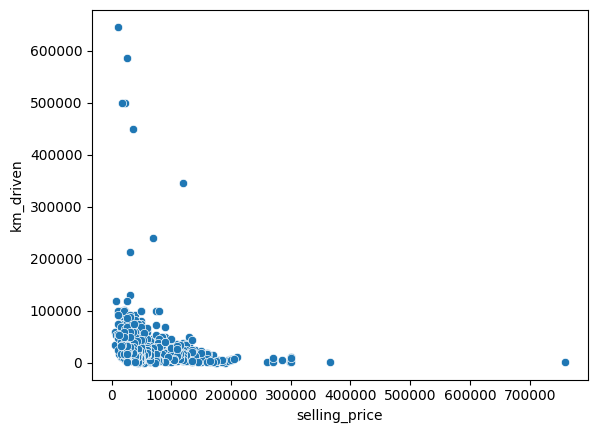

np.float64(-0.21293670714453658)

In [22]:
#10.  What is the relationship between selling_price and km_driven for first-owner bikes?

d=df[df.owner=="1st owner"]
import seaborn as sns,matplotlib.pyplot as plt

sns.scatterplot(x=d.selling_price,y=d.km_driven)
plt.show()
df.selling_price.corr(df.km_driven)
#

In [25]:
#11. Identify and remove outliers in the km_driven column using the IQR method
IQR=0
q1=df.km_driven.quantile(0.25)
q3=df.km_driven.quantile(0.75)
IQR=q3-q1
IQR

Lower_fence=q1-1.5*IQR
Upper_fence=q3+1.5*IQR
df.Km_driven=np.where(df.km_driven<=Lower_fence,Lower_fence,np.where(df.km_driven>=Upper_fence,Upper_fence,df["km_driven"]))
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


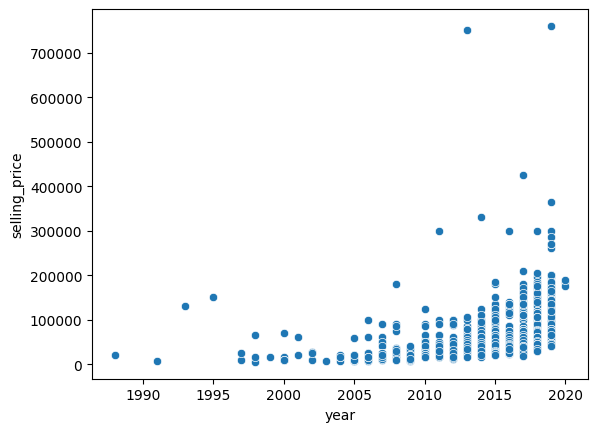

In [26]:
#12.  Perform a bivariate analysis to visualize the relationship between year and selling_price?

sns.scatterplot(x=df.year,y=df.selling_price)
plt.show()

In [30]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year)?

current_year=pd.Timestamp.now().year

df["age"]=current_year-df.year
df.age
df["dep"]=df.selling_price/df.age
df.groupby("age")["dep"].mean()


,dep
age,
5,36666.666667
6,19948.251938
7,12522.910578
8,9861.842105
9,6496.557632
10,5650.000000
11,4424.375624
12,4261.415525
13,2749.876923


In [39]:
#14.  Which bike names are priced significantly above the average price for their manufacturing year
mean_prices = df.groupby('year')['selling_price'].mean().reset_index()
mean_prices.rename(columns={'selling_price': 'year_avg_price'}, inplace=True)

# Step 2: Merge it back to the main DataFrame
df = df.merge(mean_prices, on='year', how='left')

# Step 3: Find bikes where the selling price is more than 1.5x the yearly average
premium_bikes = df[df['selling_price'] > 1.5 * df['year_avg_price']][['name', 'year', 'selling_price', 'year_avg_price']]
premium_bikes

,name,year,selling_price,year_avg_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
23,Jawa Standard,2019,180000,119689.511628
...,...,...,...,...
979,Royal Enfield Thunder 500,2015,105000,56500.000000
981,Royal Enfield Thunder 350,2013,105000,51136.986301
983,Royal Enfield Classic 350,2015,100000,56500.000000
984,Royal Enfield Classic 500,2014,95000,48668.131868


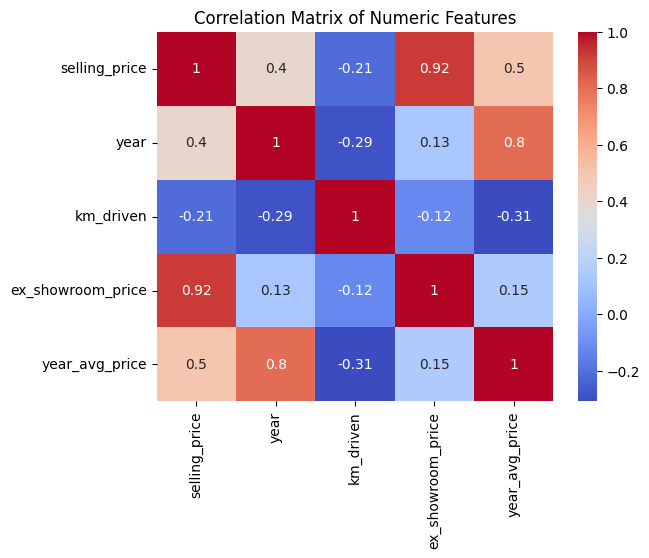

In [44]:
#15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()



EDA - 2
 About - Dataset:
 Car Sales
 Here is the dataset link:
 The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.
 Title: Car Sale Dataset
 Source:
 The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.
 Description:
 The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.
Features:
 Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 Customer Name: The name of the customer who purchased the car, represented as a string
 Gender: The gender of the customer, categorized as "Male" or "Female.
 Annual Income: The customer's annual income in US dollars, represented as a numeric value
 Dealer_Name: The name of the dealership selling the car, represented as a string
 Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 Model: The specific model name of the car, such as "Corolla," "Civic," etc
 Engine: The engine type of the car, such as "V6," "I4," etc
 Price ($): The selling price of the car in US dollars
 Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 Dealer_No: A unique identifier for each car dealer in the dataset
 Body Style: The body style of the car, such as "Sedan," "SUV," etc
 Phone: The phone number of the customer who purchased the car
 Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc


In [145]:
#EDA 2

df=pd.read_csv("Car Sale.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [146]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

df.groupby("Dealer_Name")["Price ($)"].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [50]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends?

df.groupby("Company")["Price ($)"].max().sort_values(ascending=False)
#In Cadillac	 company has highest prices


,Price ($)
Company,
Cadillac,85800
Toyota,85600
Audi,85500
Mercedes-B,85250
Chevrolet,82800
Volvo,82600
Lincoln,82500
Nissan,75700
Plymouth,75501


In [53]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare?

df.groupby("Transmission")["Price ($)"].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [54]:
#4.  What is the distribution of car prices across different regions

df.groupby("Dealer_Region")["Price ($)"].describe()


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


<Axes: xlabel='Body Style', ylabel='Count'>

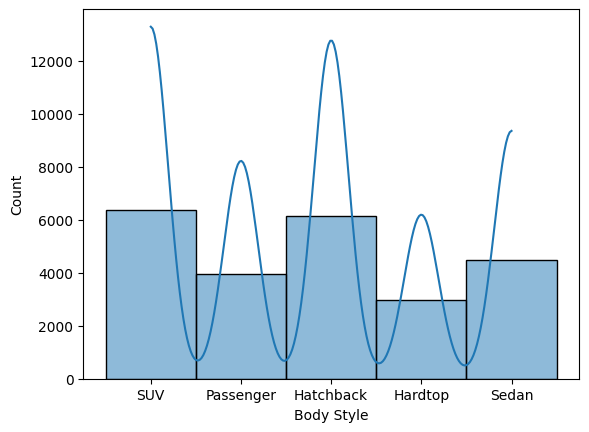

In [56]:
#5.  What is the distribution of cars based on body styles

sns.histplot(x=df["Body Style"],kde=True)

In [58]:
#6. How does the average selling price of cars vary by customer gender and annual income
df.groupby(["Gender","Annual Income"])["Price ($)"].mean().sort_values(ascending=False)

Gender  Annual Income
Male    5046000          85601.0
        1036000          85600.0
        497500           85500.0
        1414000          85400.0
Female  1483000          85301.0
                          ...   
        273000            9001.0
        656000            9001.0
Male    338000            9000.0
        387000            9000.0
        679000            9000.0
Name: Price ($), Length: 3442, dtype: float64

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

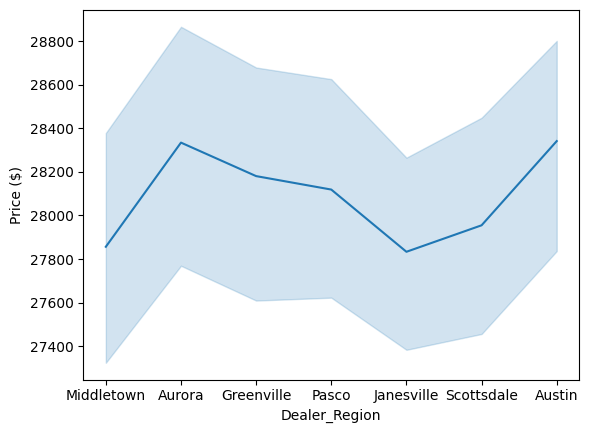

In [59]:
#7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region

sns.lineplot(x=df["Dealer_Region"],y=df['Price ($)'])

In [55]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [60]:
#8.  How does the average car price differ between cars with different engine sizes

df.groupby("Engine")["Price ($)"].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [61]:
#9.  How do car prices vary based on the customer’s annual income bracket

df.groupby("Annual Income")["Price ($)"].value_counts()

Annual Income  Price ($)
10080          22801          1
13500          22000        306
               19000        269
               21000        216
               26000        190
                           ... 
6600000        39000          1
6800000        15000          1
7650000        21000          1
8000000        85000          1
11200000       26001          1
Name: count, Length: 13908, dtype: int64

<Axes: xlabel='Model', ylabel='Price ($)'>

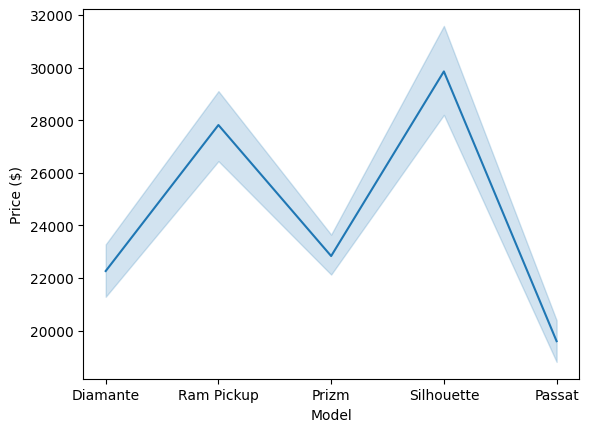

In [63]:
#10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look
models=df.Model.value_counts(ascending=False).head().index.tolist()

df1=df[df["Model"].isin(models)]


sns.lineplot(data=df1, x='Model', y='Price ($)')


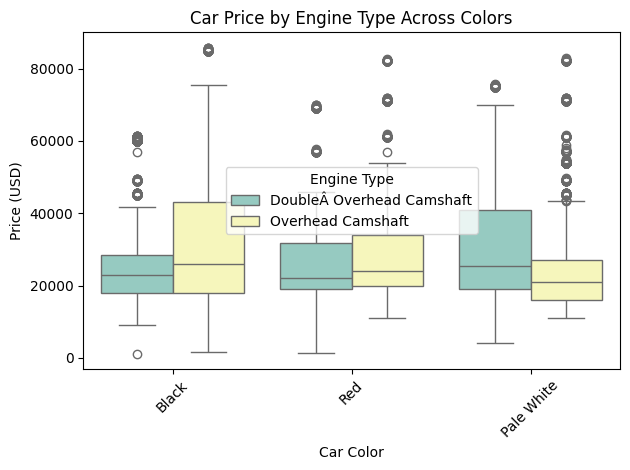


Top 5 Car Colors with Highest Price Variation (Std Dev):
                     std      IQR
Color                            
Red         15519.360962  15000.0
Black       15286.065976  18000.0
Pale White  14077.346859  15000.0


In [64]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price
# variation?

df.groupby(["Color"])[["Price ($)","Engine"]].value_counts()



df['Engine_Cat'] = df['Engine'].astype(str)

# Step 1: Plot price variation by engine size across car colors
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine_Cat', palette='Set3')
plt.title('Car Price by Engine Type Across Colors')
plt.xlabel('Car Color')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

# Step 2: Identify colors with the highest price variation (standard deviation)
color_variation = df.groupby('Color')['Price ($)'].agg(['count', 'mean', 'std', 'min', 'max', 'median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
color_variation.columns = ['count', 'mean', 'std', 'min', 'max', 'median', 'IQR']
color_variation = color_variation.sort_values(by='std', ascending=False)


# Top 5 colors with highest standard deviation in price
print("\nTop 5 Car Colors with Highest Price Variation (Std Dev):")
print(color_variation[['std', 'IQR']].head(5))

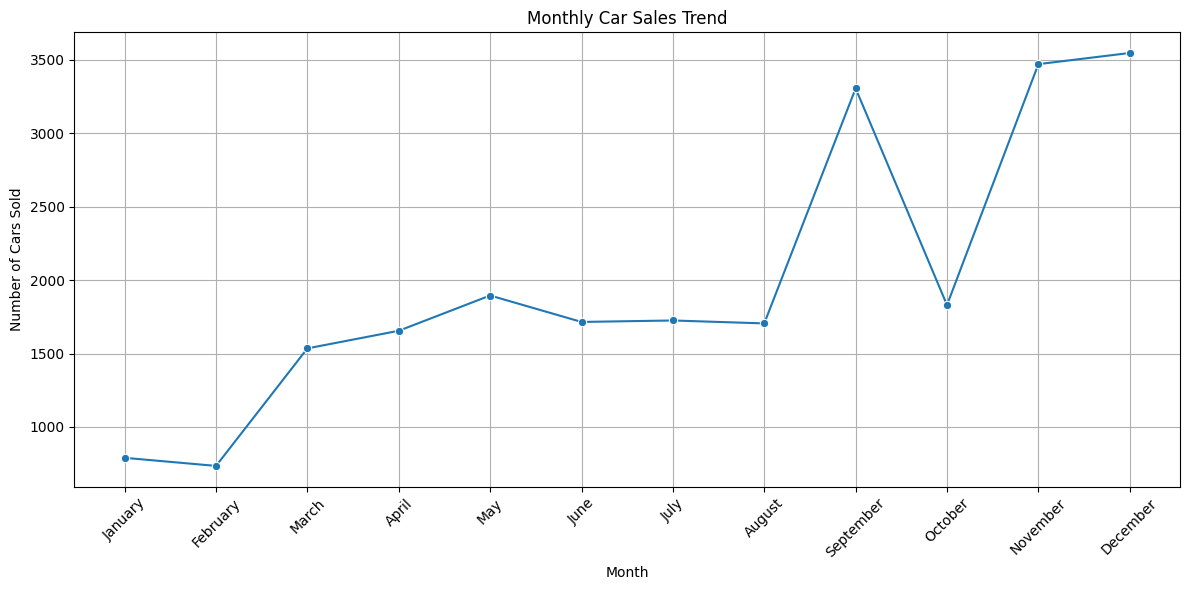

In [147]:
#12.  Is there any seasonal trend in car sales based on the date of sale

df.groupby("Date")["Price ($)"].sum().sort_values(ascending=False)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and optionally year
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month

# Group by month and count number of sales
monthly_sales = df.groupby(['Month_Num', 'Month']).size().reset_index(name='Total_Sales')
monthly_sales = monthly_sales.sort_values('Month_Num')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


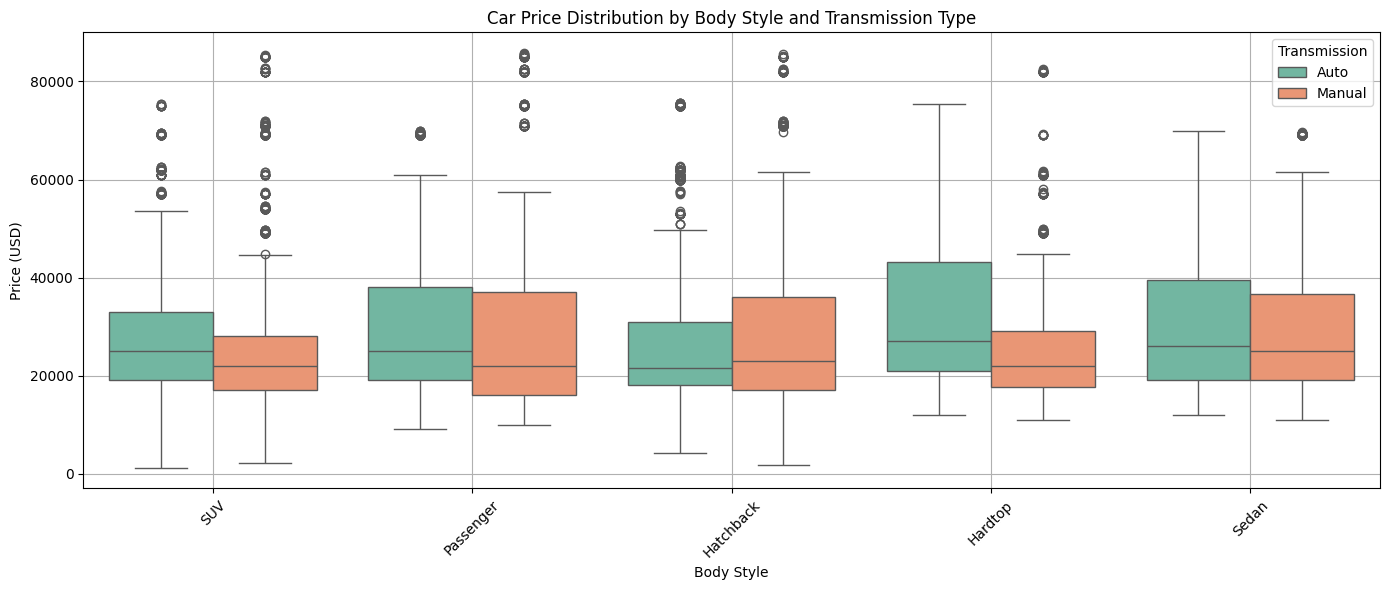

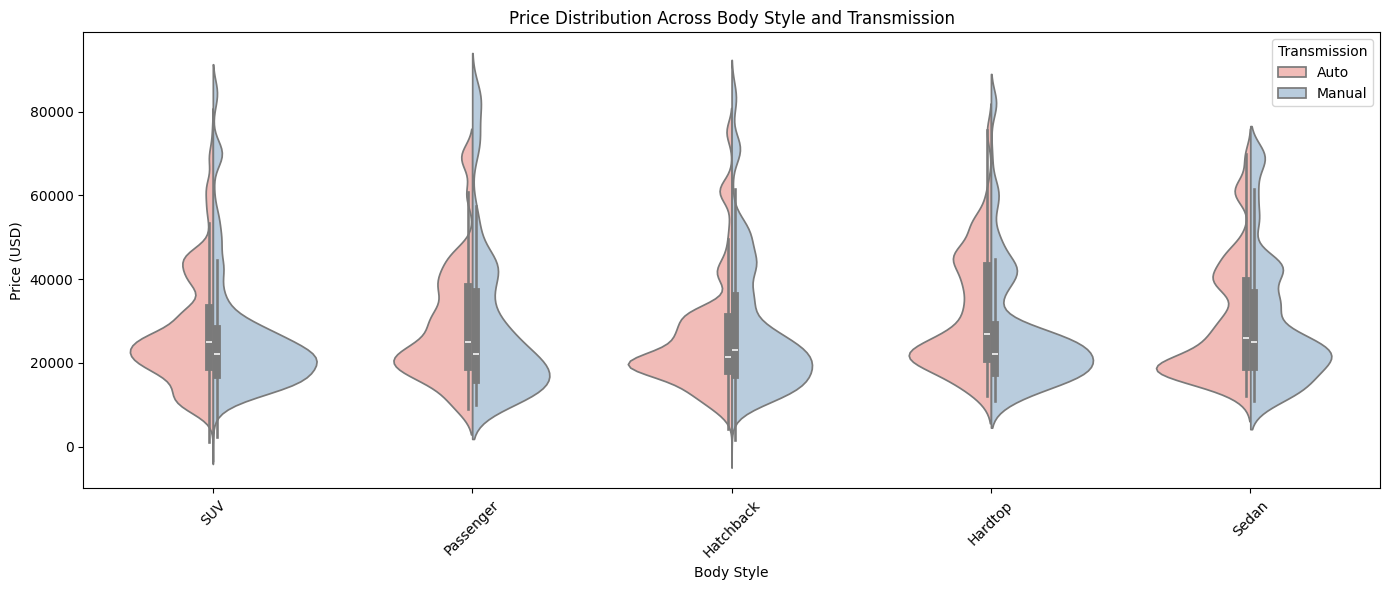

In [70]:
#13. How does the car price distribution change when considering different combinations of body style and
#transmission type


# Drop missing values in key columns if any
df = df.dropna(subset=['Body Style', 'Transmission', 'Price ($)'])

# Create a combined category (optional for grouped bar/violin)
df['Body_Transmission'] = df['Body Style'] + ' / ' + df['Transmission']

# Method 1: Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', palette='Set2')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Method 2: Violin plot for detailed distribution
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', split=True, palette='Pastel1')
plt.title('Price Distribution Across Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


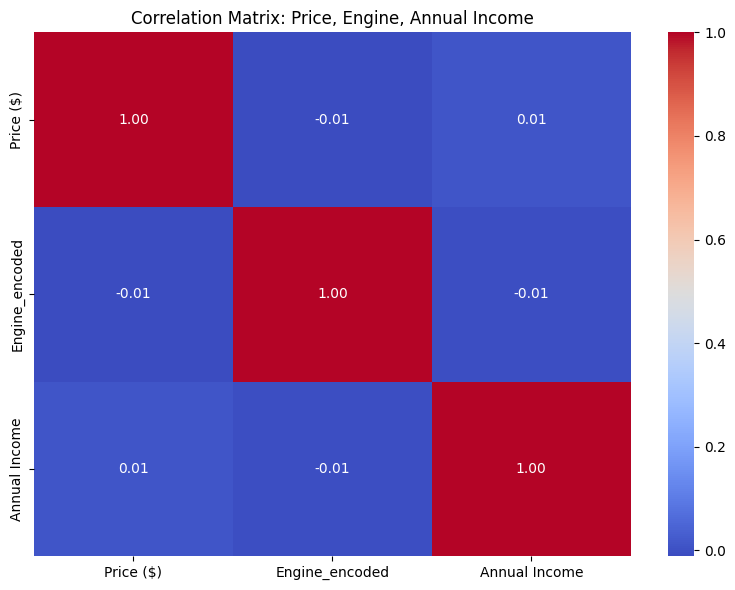

In [72]:
# #14. What is the correlation between car price, engine size, and annual income of customers, and how do these
# features interact




df['Engine_encoded'] = df['Engine'].astype('category').cat.codes

# Select relevant numeric columns
numeric_df = df[['Price ($)', 'Engine_encoded', 'Annual Income']].dropna()

# Step 1: Correlation matrix
corr = numeric_df.corr()

# Step 2: Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Price, Engine, Annual Income')
plt.tight_layout()
plt.show()


In [82]:
#15.  How does the average car price vary across different car models and engine types?

df.groupby(["Model","Engine"])["Price ($)"].mean()


Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Month', 'Month_Num', 'Body_Transmission'],
      dtype='object')

EDA - 3
 Amazon Sales Data
 Description:
 This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.
 Features:
 product_id: Unique identifier for each product
 product_name: Name of the product
 category: Category of the product
 discounted_price: Discounted price of the product
 actual_price: Actual price of the product
 discount_percentage: Percentage of discount for the product
 rating: Rating of the product (1-5)
 rating_count: Number of people who voted for the Amazon rating
 about_product: Description about the product
 user_id: ID of the user who wrote the review
 user_name: Name of the user who wrote the review
 review_id: ID of the user review
 review_title: Short review
 review_content: Long review
 img_link: Image link of the product
 product_link: Official website link of the product
 Source:
 Amazon Sale

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [84]:
df=pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [85]:
#1.  What is the average rating for each product category

df.rating=df.rating.replace("|",0)
df.rating=df.rating.astype(float)
df.groupby("category")["rating"].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [86]:
#2.  What are the top rating_count products by category
df.groupby("category")["rating"].max().sort_values(ascending=False)

,rating
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,5.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",5.0
"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,4.8
...,...
"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|HalogenHeaters",3.7
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",3.5


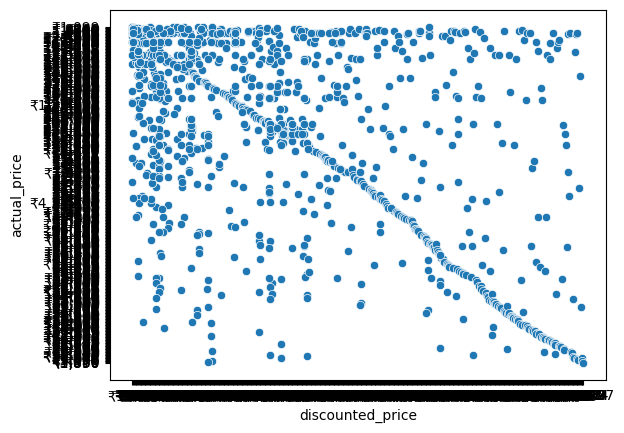

In [90]:
#3.  What is the distribution of discounted prices vs. actual prices

sns.scatterplot(x=df.discounted_price,y=df.actual_price)
plt.show()

In [96]:
#4.  How does the average discount percentage vary across categories?

df.discounted_price=df.discounted_price.str.replace("₹","",regex=False)
df.discounted_price.unique()

df.discounted_price=df.discounted_price.str.replace(",","",regex=False)

df.discounted_price=df.discounted_price.astype("float")
df.groupby("category")["discounted_price"].mean()


,discounted_price
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,2339.000000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,221.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,649.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,574.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,749.000000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",150.000000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",255.000000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",329.000000


In [97]:
#5.  What are the most popular product names

df.product_name.value_counts(ascending=False).head()

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3


In [98]:
#6.  What are the most popular product keywords

df.product_name.str.split(" ",expand=True).stack().value_counts().head()


,count
with,716
for,613
|,457
&,432
USB,342


In [99]:
#7.  What are the most popular product reviews?

df.review_content.value_counts().head()

,count
review_content,
"I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Personally, this is good for me.At this price range, this is a good phone. But if you are camera heavy user and expect to perform heavy downloads frequently, this phone may not for you. I am personally satisfied with this phone as it works for my type of usage. I will not go into plus points of this phone as they are covered by other reviews already. I am only attempting to clarify about how this phone can suit you (or not) in terms of camera and heating. I had many questions about these aspects before buying. Perhaps this review will help you make an informed decision to buy (or avoid). Cheers.,Display - BeautyCamera - decentPerformance - AmazingBattery - ok (in 5000mah u expect more tbh)Overall good phone...Also after 1day of use, i found some network connectivity issue in my jiosim, which I'm using right now in this phone, but I'll keep update this review after 1month of usage!,It's a decent mobile under this price but few things worried me , weight of the phone, too many procedure to change some settings, no screen casting. Apart from that it has good touch, a decent camera for day light , battery life is good.,I bought this smartphone for my mom. Samusung interface is very handful for easy use. Battery is superb, last whole day. Camera is mediocre but provide original colour pictures. All in all satisfied with this smartphone that i got in sale for 9499.,Unable to do video call within same service provider as in VOLTE within same service provider video call feature is available.,Product is fine. Nothing Fancy but for the budget it is a good phone.,BATTERY : more than enough for normal use Not sure in gamingCAMERA : good in this segment , can record videos in FHD 30fpsDISPLAY : since it's a LCD display the quality is a bit less , but goodV RAM : you can add upto 2gb of virtual ram but have to sacrifice your storage Space to use it OVERALL A GOOD BUDGET PHONE,Finger print is working speedy battery backup is good camera quality is also good",8
"Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 worthy product for this price, i tested it in various charger adapters 33w and 18w it supports fast charging as well.,Good,Ok,I had got this at good price on sale on Amazon and product is useful with warranty but for warranty you need to go very far not practical for such a cost and mine micro to type c connector stopped working after few days only.,I like this product",7
"I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn't ever thought that this cable will be so long it's good one and charging power is too good and also supports 

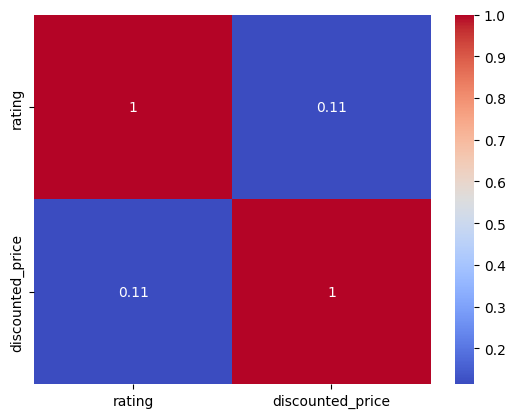

In [108]:
#8.  What is the correlation between discounted_price and rating
col=["rating","discounted_price"]
df[col].corr()
sns.heatmap(df[col].corr(),annot=True,cmap="coolwarm")
plt.show()

In [109]:
#9.  What are the Top 5 categories based on the highest ratings

df.groupby("category")["rating"].max().sort_values(ascending=False).head()

,rating
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,5.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",5.0
"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,4.8


In [110]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

df.isnull().sum() #no null
df.duplicated().sum() #no null

np.int64(0)

EDA - 4
 Dataset Link:
Spotify Data:Popular Hip-Hop Artists and Tracks
 Description of the Dataset:
 The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.
 Application in Data Science:
 This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.
 Column Descriptors:
 Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
 Track Name: The title of the track, encapsulating its identity and essence.
 Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
 Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
 Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("spotify.csv")
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [112]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful

df.isnull().sum()#no null values
df[df.duplicated()]
df=df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df[df.duplicated()] #no duplicates


,Artist,Track Name,Popularity,Duration (ms),Track ID


<Axes: xlabel='Popularity', ylabel='Count'>

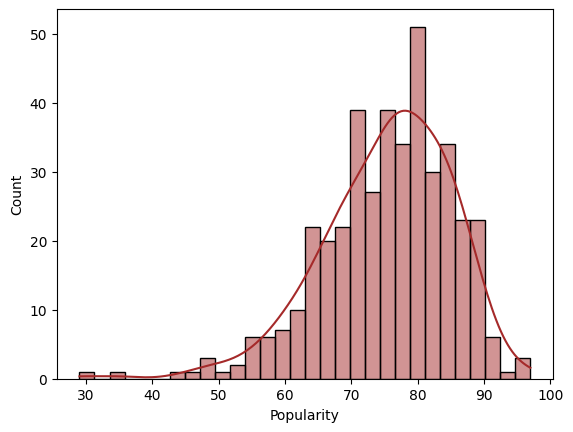

In [115]:
#2.  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

sns.histplot(x=df.Popularity,bins=30,color="brown",kde=True)

<Axes: xlabel='Duration (ms)', ylabel='Popularity'>

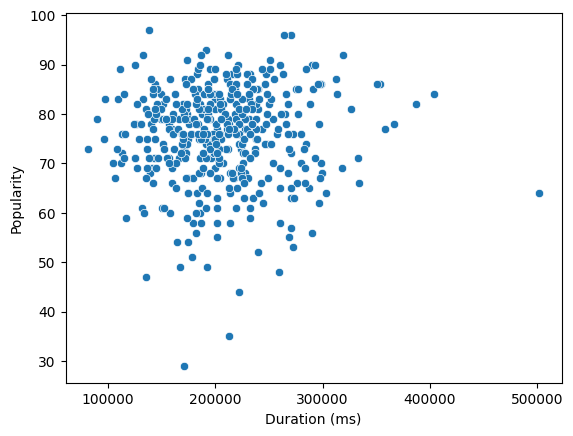

In [116]:
#3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

sns.scatterplot(x=df["Duration (ms)"],y=df.Popularity)

<Axes: xlabel='Artist', ylabel='count'>

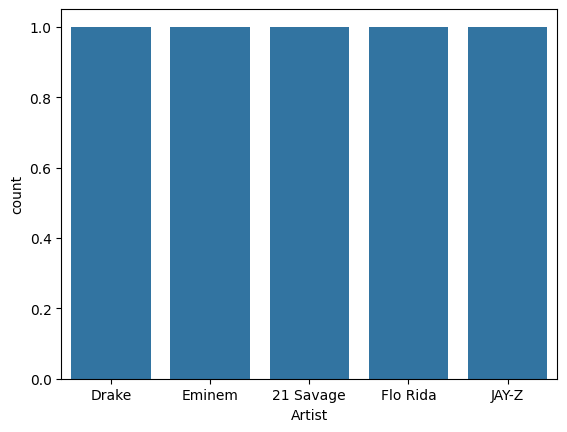

In [119]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot.

count=df.groupby("Artist")["Track Name"].count().sort_values(ascending=False).head()
sns.countplot(count)


In [120]:
#5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
df1=df.sort_values("Popularity").reset_index().head()
df1[["Artist","Track Name","Popularity"]]



,Artist,Track Name,Popularity
0,Pressa,Attachments (feat. Coi Leray),29
1,Justin Bieber,Intentions,35
2,French Montana,Splash Brothers,44
3,Lil Baby,On Me - Remix,47
4,Wyclef Jean,911 (feat. Mary J. Blige),48


In [121]:
# #6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist
df1=df.sort_values("Popularity").reset_index().tail()
m=df1.Popularity.median()
df[df["Popularity"]==m]["Artist"]

,Artist
68,21 Savage
247,¥$


,Popularity
Artist,
21 Savage,96.0
Jack Harlow,97.0
Travis Scott,93.0
cassö,92.0
¥$,96.0


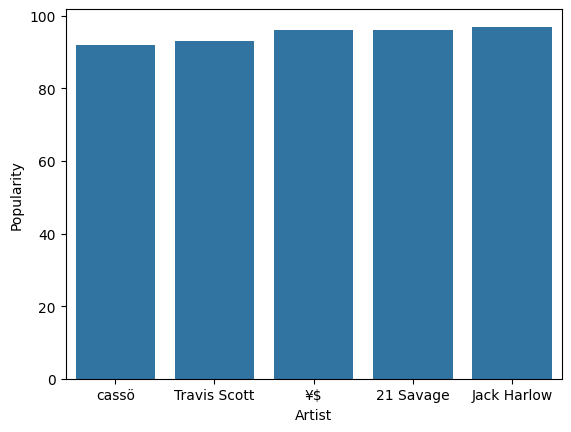

In [122]:
# Calculate and display the average popularity for each artist
sns.barplot(x=df1.Artist,y=df1.Popularity)
df1.groupby("Artist")["Popularity"].mean()

In [123]:
#7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
df1=df.sort_values("Popularity").reset_index().tail()
df1[["Artist","Track Name"]]

,Artist,Track Name
408,cassö,Prada
409,Travis Scott,FE!N (feat. Playboi Carti)
410,¥$,CARNIVAL
411,21 Savage,redrum
412,Jack Harlow,Lovin On Me


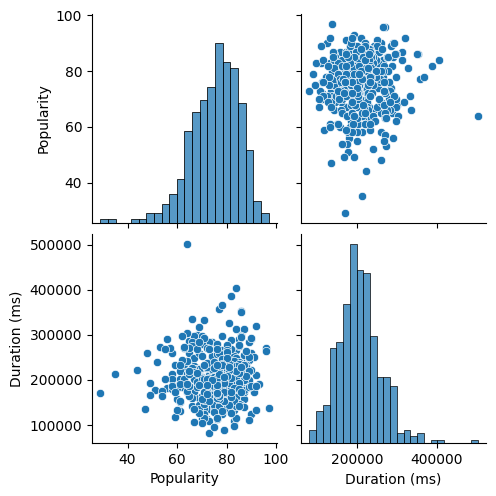

In [126]:
#8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot
num=df.select_dtypes(include=np.number).columns.tolist()
num
sns.pairplot(df[num])


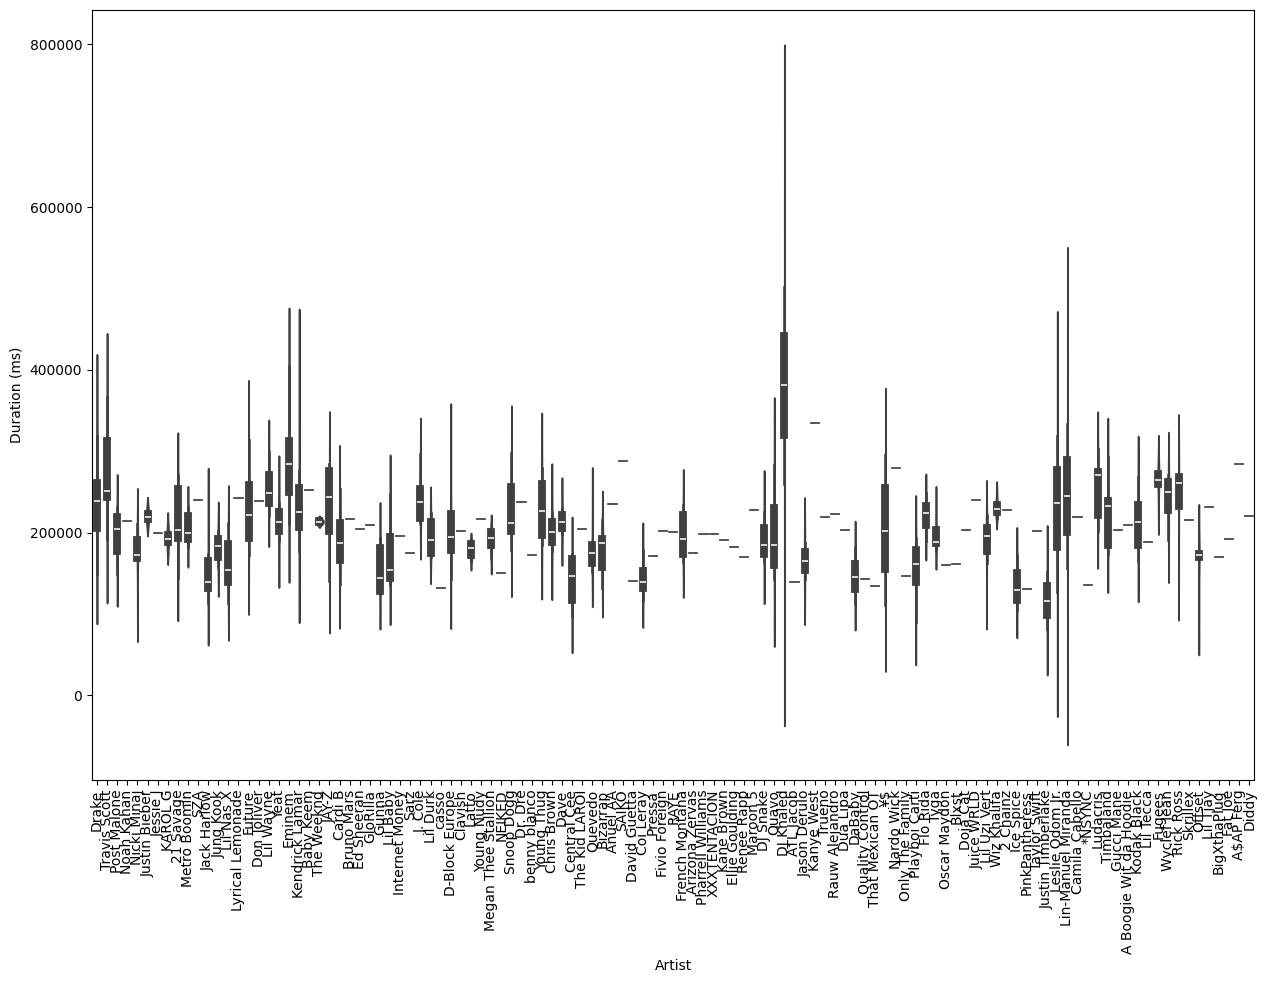

In [141]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot

plt.figure(figsize=(15,10))

sns.violinplot(x=df.Artist,y=df["Duration (ms)"])
plt.xticks(rotation=90)
plt.show()

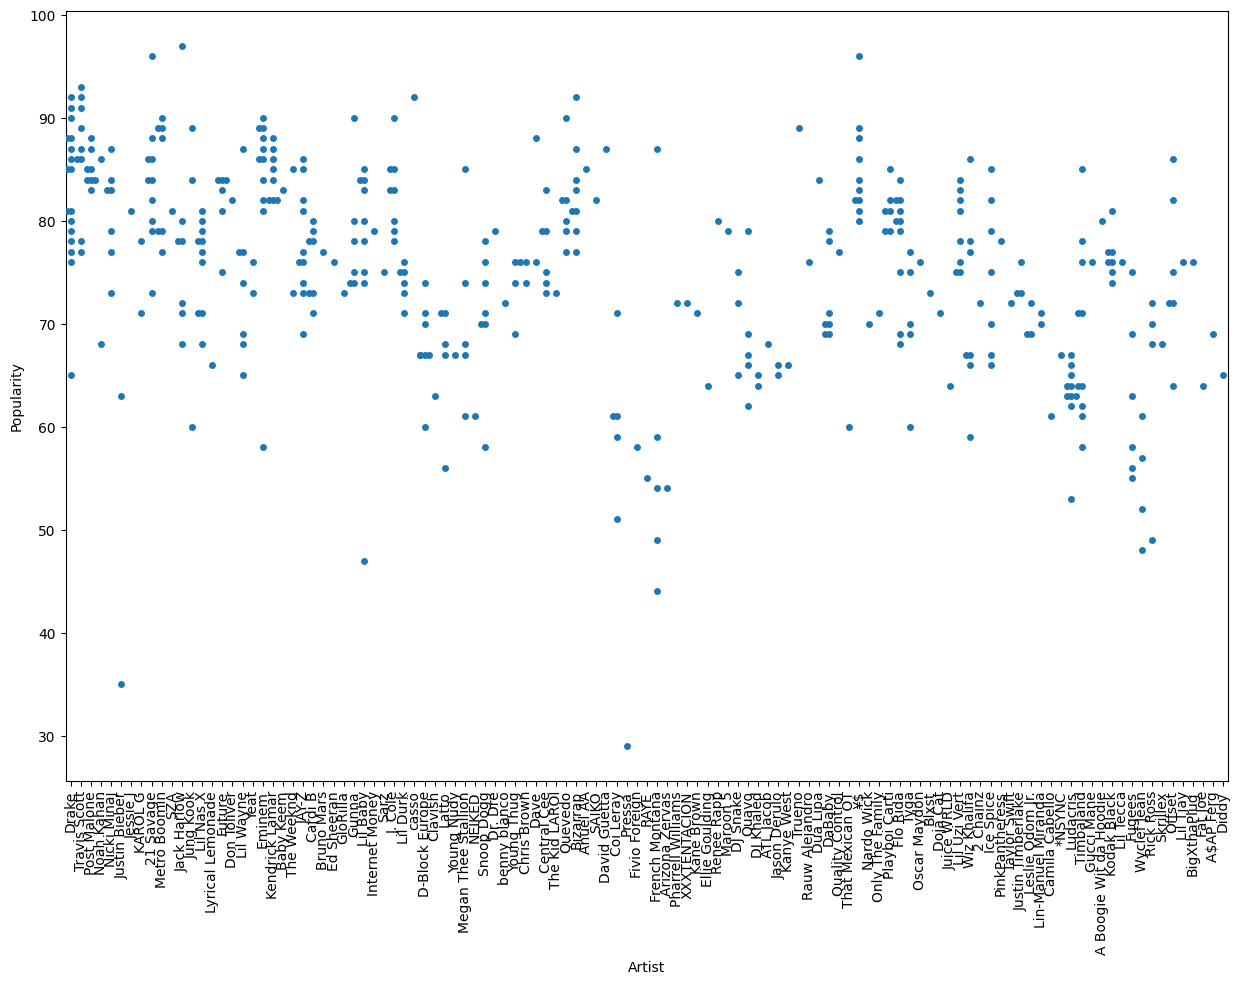

In [135]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot

plt.figure(figsize=(15,10))
sns.swarmplot(x=df.Artist,y=df.Popularity)
plt.xticks(rotation=90)
plt.show()